In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from surprise import Dataset, Reader, SVD, KNNBasic, accuracy
from surprise.model_selection import train_test_split, cross_validate

# Exploratory Data Analysis

In [3]:
# Reading processed data
df = pd.read_csv('../Data/ratings_processed.csv')

In [4]:
df.head()

,userId,productId,Rating,timestamp
0,A3LDPF5FMB782Z,1400501466,5.0,1336003200
1,A1A5KUIIIHFF4U,1400501466,1.0,1332547200
2,A2XIOXRRYX0KZY,1400501466,3.0,1371686400
3,AW3LX47IHPFRL,1400501466,5.0,1339804800
4,A1E3OB6QMBKRYZ,1400501466,1.0,1350086400


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65290 entries, 0 to 65289
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     65290 non-null  object 
 1   productId  65290 non-null  object 
 2   Rating     65290 non-null  float64
 3   timestamp  65290 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 2.0+ MB


In [6]:
# removing timestamp column
df.drop('timestamp', axis=1, inplace=True)

In [7]:
# checking summary statistics
df.describe()

,Rating
count,65290.000000
mean,4.294808
std,0.988915
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


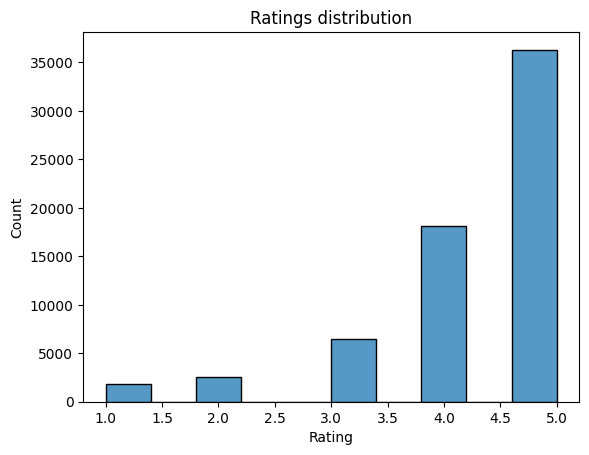

In [8]:
# Visualizing the distribution of ratings
sns.histplot(df['Rating'], bins=10, kde=False)
plt.title("Ratings distribution")
plt.show()

In [10]:
# number of unique users and products
n_users = df['userId'].nunique()
n_products = df['productId'].nunique()
print(f'Number of unique users: {n_users}') 
print(f'Number of unique products: {n_products}')

Number of unique users: 1540
Number of unique products: 5689


In [11]:
# top 5 most rated products
top_5_products = df['productId'].value_counts().head(5)
print("Top 5 most rated products:", top_5_products)

# top 5 most active users
top_5_users = df['userId'].value_counts().head(5)
print("Top 5 most active users:", top_5_users)

Top 5 most rated products: productId
B0088CJT4U    206
B003ES5ZUU    184
B000N99BBC    167
B007WTAJTO    164
B00829TIEK    149
Name: count, dtype: int64
Top 5 most active users: userId
ADLVFFE4VBT8      295
A3OXHLG6DIBRW8    230
A1ODOGXEYECQQ8    217
A36K2N527TXXJN    212
A25C2M3QF9G7OQ    203
Name: count, dtype: int64


In [12]:
# finding least active users and their given ratings
least_active_users = df['userId'].value_counts().tail(5)
print("Least active users and their ratings:")
for user in least_active_users.index:
    user_ratings = df[df['userId'] == user]
    print(f"User {user} ratings:\n{user_ratings}\n")
    

Least active users and their ratings:
User A16CVJUQOB6GIB ratings:
              userId   productId  Rating
536   A16CVJUQOB6GIB  B000051299     5.0
8139  A16CVJUQOB6GIB  B000OGX5AM     5.0

User A2BGZ52M908MJY ratings:
               userId   productId  Rating
406    A2BGZ52M908MJY  B00004ZCA5     5.0
32240  A2BGZ52M908MJY  B004HO59M4     5.0

User A3DL29NLZ7SXXG ratings:
               userId   productId  Rating
13570  A3DL29NLZ7SXXG  B001EM9JXC     5.0

User AP2NZAALUQKF5 ratings:
             userId   productId  Rating
7053  AP2NZAALUQKF5  B000K4V4X8     1.0

User A3MV1KKHX51FYT ratings:
               userId   productId  Rating
10645  A3MV1KKHX51FYT  B0011ZH0BK     5.0



In [14]:
# finding least rated products and their ratings
least_rated_products = df['productId'].value_counts().tail(5)
print("Least rated products and their ratings:")
for product in least_rated_products.index:
    product_ratings = df[df['productId'] == product]
    print(f"Product {product} ratings:\n{product_ratings}\n")

Least rated products and their ratings:
Product B00368CDH6 ratings:
               userId   productId  Rating
23747  A3V5F050GVZ56Q  B00368CDH6     5.0
23748   AOEAD7DPLZE53  B00368CDH6     5.0
23749  A3QU3O79AGNWCY  B00368CDH6     3.0
23750  A3DGJMO6VPG6FJ  B00368CDH6     4.0
23751  A1YEPFLLH42OU1  B00368CDH6     5.0

Product B0036AZA6A ratings:
               userId   productId  Rating
23776  A16C19G0I2DE8S  B0036AZA6A     5.0
23777  A1L64KDYO5BOJA  B0036AZA6A     5.0
23778  A3R1GJY2MY8041  B0036AZA6A     5.0
23779  A1CMD08Z49PGKQ  B0036AZA6A     5.0
23780  A1901NTE8LFJF6  B0036AZA6A     4.0

Product B0036E8V08 ratings:
               userId   productId  Rating
23781  A2PZXXPGLXXKZU  B0036E8V08     4.0
23782   APGQTZZ4ZFPHO  B0036E8V08     4.0
23783  A2DF62DP20RIXF  B0036E8V08     4.0
23784  A21GW4L8FO307V  B0036E8V08     5.0
23785  A23E9QQHJLNGUI  B0036E8V08     5.0

Product B0036QL1JY ratings:
               userId   productId  Rating
23847   ACJT8MUC0LRF0  B0036QL1JY     5.0
23848

In [16]:
# finding average rating per product
average_ratings = df.groupby('productId')['Rating'].mean().sort_values(ascending=False)
average_ratings

productId
B00LGQ6HL8    5.000000
B003DZJQQI    5.000000
B005FDXF2C    5.000000
B00I6CVPVC    5.000000
B00B9KOCYA    5.000000
                ...   
B003O2RVGM    1.833333
B000ND75C0    1.833333
B007C0Y7RI    1.625000
B004OBUFYW    1.400000
B000UF3FT8    1.375000
Name: Rating, Length: 5689, dtype: float64

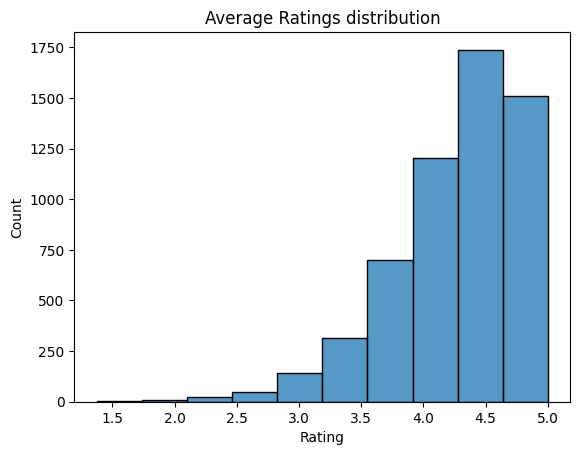

In [18]:
# visualizing average ratings distribution
sns.histplot(average_ratings, bins=10, kde=False)
plt.title("Average Ratings distribution")
plt.show()
